# Linear Algebra. Home work N5

## Ivan Prodaiko

$\newcommand{\norm}[1]{\lvert #1 \rvert}$

In [1]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
import numpy.linalg as la

from numpy import inf

%matplotlib inline

## Problam 1

### a)

In order to write matrix of size $m x n$ as a sum of $u_jv_j^T$ of rank 1 we need to start from the fact that the result of multiplication of two vectors is a matrix that has the same rank 1.


$A = vw^T$ 

If $u \in R^m$, then $Au = vw^Tu = (uw)v$. Thus, $A$ maps every vector in $R^m$ to a scalar multiple of v, hence $rank(A) = dim(𝐴) = 1$. [A rank-one matrix is the product of two vectors](https://math.stackexchange.com/q/1545147)

So, in order to recreate matrix we need to take at least $n$ number of independent ortogonal vectors, such that $n = rank(A)$ and sum them up. This representation is unique, because we could split our vectors into more and more, but the number of summonds will increase the rank of matrix.

### b)

#### Matrix A

Matrix A has rank 1. We could clearly see this from the fact that it has only one linear independent row, and others are multiples of it:

$(-1)^mm$

Moreover, this matrix is symmetric, so it could be represented as multiple of row 1 on column 1.

#### Matrix B

Matrix B has rank 2. It could be clearly seen if we start to apply row reduction to it.

$B = \begin{pmatrix}
    1 & 2 & 3 & 4 \\
    2 & 3 & 4 & 5 \\
    3 & 4 & 5 & 6 \\
    4 & 5 & 6 & 7
\end{pmatrix} \sim \begin{pmatrix}
    1 & 2 & 3 & 4 \\
    0 & -1 & -2 & -3 \\
    0 & -2 & -4 & -6 \\
    0 & -3 & -9 & -12
\end{pmatrix}
$

Everything after this point is clear. 

In [2]:
A = np.array([
    [1, -2, 3, -4], 
    [-2, 4, -6, 8],
    [3, -6, 9, -12], 
    [-4, 8, -12, 16],
])
print("Matrix rank of A: {}".format(la.matrix_rank(A)))

x1 = np.array([[1, -2, 3, -4]])
y1 = np.array([[1, -2, 3, -4]])

print('Matrix obteined by multipication of 1 vector on itself:\n', y1.T.dot(x1), '\n')

B = np.array([
    [1, 2, 3, 4], 
    [2, 3, 4, 5],
    [3, 4, 5, 6], 
    [4, 5, 6, 7],
])

print("Matrix rank of B: {}".format(la.matrix_rank(B)))

x1 = np.array([[1, 2, 3, 4]])
y1 = np.array([[1, 2, 3, 4]])

x2 = np.array([[0, 1, 2, 3]])
y2 = np.array([[0, -1, -2, -3]])

print('\n', y1.T.dot(x1) + y2.T.dot(x2), '\n')

Matrix rank of A: 1
Matrix obteined by multipication of 1 vector on itself:
 [[  1  -2   3  -4]
 [ -2   4  -6   8]
 [  3  -6   9 -12]
 [ -4   8 -12  16]] 

Matrix rank of B: 2

 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]] 



## Problam 2

Singular values of matrix $A$ are square roots of eigenvalues of matrix $A^TA$

So, algorithm is quite streight forward:
- Calculate $A^TA$
- Find eigenvalues of $A^TA$
- Take square root from each of them.

### a)

Singular values of $A$ are equal to singular values of $A^T$.

$A = U\Sigma V^T \quad A^T = (U\Sigma V^T)^T = U^T\Sigma^T V$

As far as $\Sigma$ doesn't change, than singular values are the same.

### b)

- i

$A = \begin{pmatrix}
    0 & 1 & 2 \\
\end{pmatrix}$

$\lambda_1 = 5 \quad\lambda_2 = 0 \quad\lambda_3 = 0$

$\sigma_1 = \sqrt{5} \quad\sigma_2 = 0 \quad\sigma_3 = 0$

- ii

$A = \begin{pmatrix}
    0 \\
    1 \\
    2 \\
\end{pmatrix}$

$\lambda_1 = 5$

$\sigma_1 = \sqrt{5}$

- iii

$ A = \begin{pmatrix}
    1 & 2 & 2 \\
    1 & 3 & 3 \\
\end{pmatrix}$

$\lambda_1 = 14 + \sqrt{194} \quad\lambda_2 = \dfrac{2}{14 + \sqrt{194}} \quad\lambda_3 = 0$

$\sigma_1 = \sqrt{14 + \sqrt{194}} \quad\sigma_2 = \sqrt{\dfrac{2}{14 + \sqrt{194}}} \quad\sigma_3 = 0$

- iv

$ A = \begin{pmatrix}
    0 & 1 & 2 \\
\end{pmatrix}$

$\lambda_1 = \dfrac{1}{2}(9 + \sqrt{17}) \quad\lambda_2 = \dfrac{1}{2}(9 - \sqrt{17})$

$\sigma_1 = \sqrt{\dfrac{1}{2}(9 + \sqrt{17})} \quad\sigma_2 = \sqrt{\dfrac{1}{2}(9 - \sqrt{17})}$

## Problam 3

### a)

$A = U\Sigma V^T \quad A^T = (U\Sigma V^T)^T = U^T\Sigma^T V$


### b)

$A = uv^T$

$A^TA = (uv^T)^T(uv^T) = (vu^T)(uv^T) = v(u^Tu)v^T = \norm{u}^2 vv^T$

The rank of A is r, the number of nonzero singular values. So, matrix $\Sigma$ will consist only one non-zero entry that is square root of $A^TA$ eigenvalue.

What is the eigenvalue and corresponding eigenvector of $A^TA$?

$(vv^T)v = \lambda v$

$(vv^T)v = v(v^Tv) = v\norm{v}^2 = \norm{v}^2v = \lambda v$

$\norm{u}^2\norm{v}^2 = \lambda$

Thus, the only eigenvector is $v$.

$\sigma_1 = \sqrt{\lambda} = \norm{u}\norm{v}$

$\Sigma = \begin{pmatrix}
    \norm{u}\norm{v} & 0_{12} & \dots & 0_{1n} \\
    0_{21} & 0_{22} & \dots & 0_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    0_{m1} &  0_{m2} & \dots & 0_{mn} \\
\end{pmatrix}$

$V = \begin{pmatrix}
    \dfrac{v}{\norm{v}} & 0 & \dots & 0
\end{pmatrix}$

For matrix $U$ we have only one non-zero column $u_1$

$u_1 = \dfrac{1}{\norm{u}\norm{v}}uv^Tv = \dfrac{u\norm{v}^2}{\norm{u}\norm{v}} = \dfrac{u\norm{v}}{\norm{u}}$

$U = \begin{pmatrix}
    u_1 & 0 & \dots & 0
\end{pmatrix}$

$A = 
\begin{pmatrix}
    \dfrac{v}{\norm{v}} & 0 & \dots & 0
\end{pmatrix} 
\begin{pmatrix}
    \norm{u}\norm{v} & 0_{12} & \dots & 0_{1n} \\
    0_{21} & 0_{22} & \dots & 0_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    0_{m1} &  0_{m2} & \dots & 0_{mn} \\
\end{pmatrix}
\begin{pmatrix}
    u_1 & 0 & \dots & 0
\end{pmatrix}$

### C)

- i 

$A = \begin{pmatrix} 0 & 1 & 2 \end{pmatrix}$

$A = \begin{pmatrix}1\end{pmatrix}
\begin{pmatrix}\sqrt{5} & 0 & 0\end{pmatrix}\begin{pmatrix}
    0 & \dfrac{1}{\sqrt{5}} & \dfrac{2}{\sqrt{5}} \\
    0 & 0 & 0 \\
    0 & 0 & 0
\end{pmatrix}$
- ii

$A = \begin{pmatrix}0 \\ 1 \\ 2\end{pmatrix}$

$A = \begin{pmatrix}
    0 & 0 & 0 \\
    \dfrac{1}{\sqrt{5}} & 0 & 0 \\
    \dfrac{2}{\sqrt{5}} & 0 & 0
\end{pmatrix}
\begin{pmatrix}\sqrt{5} \\ 0 \\ 0\end{pmatrix}
\begin{pmatrix}1\end{pmatrix}$

- iii

$A = \begin{pmatrix}2 & 1 & 2 \\ -2 & -1 & 2\end{pmatrix}$

Lets use some code (it will be reused in Problem 4)

In [3]:
def svd_2x3(A):
    print("\nMatrix A:\n{}".format(A))
    print("\nMatrix A^T:\n{}".format(A.T))

    B = A.T

    B_TB = B.T.dot(B)
    print("\nMatrix B^TB:\n{}".format(B_TB))

    eigenvals, eigenvecs = la.eigh(B_TB)
    print("\na) Since matrix B has rank: {}, it means that number of singular values is the same as rank(B)".format(la.matrix_rank(B)))

    print("\nEigenvalues of B^TB:\n{}".format(np.around(eigenvals, decimals=2)))

    E = np.append(np.sqrt(np.diag(eigenvals)), np.zeros(shape = (1, 2)), axis = 0)
    print("\nMatrix E: \n{}".format(np.around(E, decimals=2)))

    V = eigenvecs
    print("\nEigenvectors of B^TB:\n{}".format(np.around(eigenvecs, decimals=2)))

    print("\nb) Right singular vectors of matrix B:\n{}".format(np.around(V, decimals=2)))

    U = np.append(1/np.sqrt(eigenvals)*B.dot(V), np.zeros(shape = (3, 1)), axis = 1)
    np.nan_to_num(U, 0)
    print("\nc) Left singular vectors of matrix B:\n{}".format(np.around(U, decimals=2)))

    print("\nd) Lets check our solution. B=B:\n{}={}".format(B, U.dot(E).dot(V.T)))
    print("\nd) Convert to A. A=A:\n{}={}".format(A, V.dot(E.T).dot(U.T)))
    return V, E.T, U.T
    
_, _, _ = svd_2x3(np.array([[2, 1, -2], [-2, -1, 2]]))


Matrix A:
[[ 2  1 -2]
 [-2 -1  2]]

Matrix A^T:
[[ 2 -2]
 [ 1 -1]
 [-2  2]]

Matrix B^TB:
[[ 9 -9]
 [-9  9]]

a) Since matrix B has rank: 1, it means that number of singular values is the same as rank(B)

Eigenvalues of B^TB:
[ 0. 18.]

Matrix E: 
[[0.   0.  ]
 [0.   4.24]
 [0.   0.  ]]

Eigenvectors of B^TB:
[[-0.71 -0.71]
 [-0.71  0.71]]

b) Right singular vectors of matrix B:
[[-0.71 -0.71]
 [-0.71  0.71]]

c) Left singular vectors of matrix B:
[[ 0.   -0.67  0.  ]
 [ 0.   -0.33  0.  ]
 [ 0.    0.67  0.  ]]

d) Lets check our solution. B=B:
[[ 2 -2]
 [ 1 -1]
 [-2  2]]=[[ 2. -2.]
 [ 1. -1.]
 [-2.  2.]]

d) Convert to A. A=A:
[[ 2  1 -2]
 [-2 -1  2]]=[[ 2.  1. -2.]
 [-2. -1.  2.]]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


## Problam 4

Matrix $A$ is $2x3$, so $A^TA$ is $3x3$, while matrix A^T is $3x2$ and $(A^T)^T(A^T)$ is $2x2$ we will use $A^T$.

In [4]:
U, E, V_T = svd_2x3(np.array([[3, 2, 2], [2, 3, -2]]))


Matrix A:
[[ 3  2  2]
 [ 2  3 -2]]

Matrix A^T:
[[ 3  2]
 [ 2  3]
 [ 2 -2]]

Matrix B^TB:
[[17  8]
 [ 8 17]]

a) Since matrix B has rank: 2, it means that number of singular values is the same as rank(B)

Eigenvalues of B^TB:
[ 9. 25.]

Matrix E: 
[[3. 0.]
 [0. 5.]
 [0. 0.]]

Eigenvectors of B^TB:
[[-0.71  0.71]
 [ 0.71  0.71]]

b) Right singular vectors of matrix B:
[[-0.71  0.71]
 [ 0.71  0.71]]

c) Left singular vectors of matrix B:
[[-0.24  0.71  0.  ]
 [ 0.24  0.71  0.  ]
 [-0.94  0.    0.  ]]

d) Lets check our solution. B=B:
[[ 3  2]
 [ 2  3]
 [ 2 -2]]=[[ 3.  2.]
 [ 2.  3.]
 [ 2. -2.]]

d) Convert to A. A=A:
[[ 3  2  2]
 [ 2  3 -2]]=[[ 3.  2.  2.]
 [ 2.  3. -2.]]


## Problam 5

### b)

Having matrixes $U, E, V^T$ we could extract only one (biggest) singular value for rank one best approximation and use it to calculate matrix $B$, which will contain the most of the info from matrix $A$.

For matrix $A$ from problem it would be $\sigma_1\vec{u}_1\vec{v}_1^T$

In [5]:
print("\nMatrix U: \n{}".format(np.around(U, decimals=2)))
print("\nMatrix E: \n{}".format(np.around(E, decimals=2)))
print("\nMatrix V^T: \n{}".format(np.around(V_T, decimals=2)))
print("Best rank one approximation: {}".format(E[1, 1]*U[:,1].dot(V_T[1:])))


Matrix U: 
[[-0.71  0.71]
 [ 0.71  0.71]]

Matrix E: 
[[3. 0. 0.]
 [0. 5. 0.]]

Matrix V^T: 
[[-0.24  0.24 -0.94]
 [ 0.71  0.71  0.  ]
 [ 0.    0.    0.  ]]
Best rank one approximation: [2.5 2.5 0. ]


## Problam 6

For this task we have to note that in matrix $\Sigma$ singular values are placed in descending order, so that $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_n \geq 0$, thus we could simply cut off $n$ number of vectors that contains the least information.

Intuition behind best rank K approximation:

Since singular values in matrix $\Sigma$ are placed in discending order we could map matrix $A$ from the space $R^{rank(A)}$ to lower dimention $R^{rank(A) - n}$. Being sorted in descending order means, that the vectors from the left of matrix $U$ will be scaled more than from the right. That gives us an ability to take more info from them.

We could consider entries of matrix $\Sigma$ as an inverse distances from $A$ to $V$ in $R^{rank(A) - n}$. So, by taking $n$ entries in $\Sigma$ we could minimize this value.

## Problam 7

Default image shape:
(1280, 1126, 3)


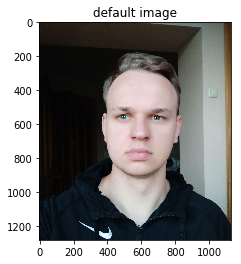

Drop one dimention. Image shape
(1280, 1126)


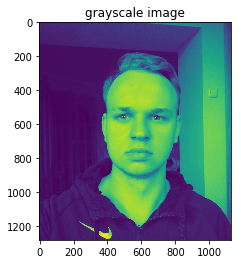

In [6]:
img = cv2.imread('me.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Default image shape:")
print(img.shape)

plt.imshow(img)
plt.title('default image')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print("Drop one dimention. Image shape")
print(gray.shape)

plt.imshow(gray)
plt.title('grayscale image')
plt.show()

In [7]:
imgmat = np.matrix(gray)

print("\nMatrix rank: {}".format(la.matrix_rank(imgmat)))

U, sigma, V = np.linalg.svd(imgmat)


Matrix rank: 1126


Norm of default image: 137471.49265938738
Norm: 135716.13634618185


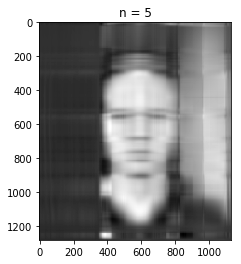

Norm: 136543.04841396786


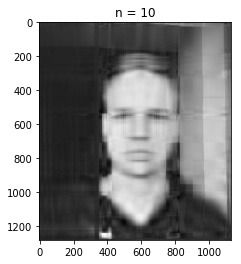

Norm: 136872.22448036764


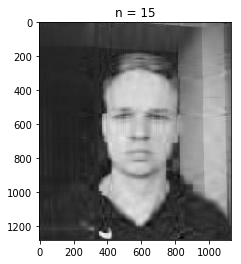

Norm: 137041.29000577246


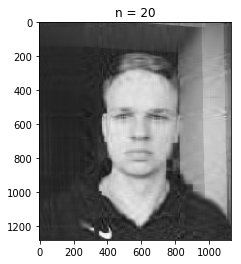

Norm: 137147.28349581087


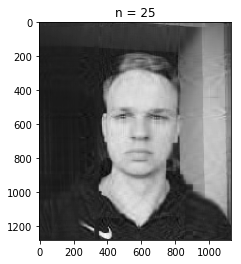

Norm: 137219.62314993725


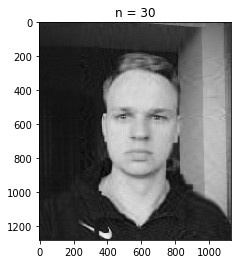

Norm: 137269.3304287945


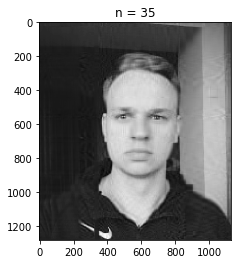

Norm: 137304.15579550582


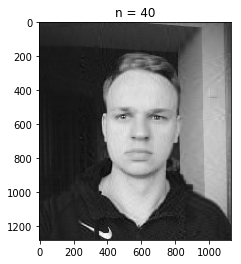

Norm: 137330.4799578799


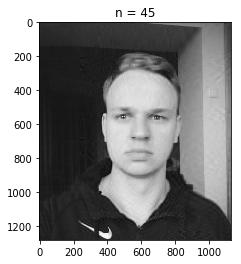

Norm: 137350.53585951673


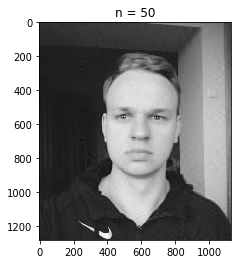

In [8]:
print("Norm of default image:", la.norm(sigma))

for i in range(5, 51, 5):
    print("Norm:", la.norm(sigma[:i]))
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

As one can see only 5 singular values have extracted almost of main elements. 20 singular values is totally ok to see all of main features, while 50 gives a good image.

## Problam 8

$
A = \dfrac{1}{\sqrt{10}}\begin{pmatrix}
    10 & 6 \\
    0 & 8
\end{pmatrix}
$

In [9]:
A = 1/np.sqrt(10)*np.array([[10, 6],[0, 8]])

A_TA = A.T.dot(A)

print("\nMatrix A^TA:\n{}".format(A_TA))

eigenvals, eigenvecs = la.eigh(A_TA)
print("\nMatrix A rank: {}".format(la.matrix_rank(A)))
print("\nEigenvalues of A^TA:\n{}".format(np.around(eigenvals, decimals=2)))

E = np.sqrt(np.diag(eigenvals))
print("\nMatrix E: \n{}".format(np.around(E, decimals=2)))

V = eigenvecs
print("\nEigenvectors of A^TA:\n{}".format(np.around(eigenvecs, decimals=2)))
print("\nRight singular vectors of matrix A:\n{}".format(np.around(V, decimals=2)))

U = 1/np.sqrt(eigenvals)*A.dot(V)
print("\nLeft singular vectors of matrix A:\n{}".format(np.around(U, decimals=2)))

Q = U.dot(V.T)
print("\nQ = UV^T:\n{}".format(np.around(Q, decimals=2)))

S = V.dot(E).dot(V.T)
print("\nS = VEV^T:\n{}".format(np.around(S, decimals=2)))

print("\nA = QS:\n{}={}".format(np.around(A, decimals=2), np.around(Q.dot(S), decimals=2)))


Matrix A^TA:
[[10.  6.]
 [ 6. 10.]]

Matrix A rank: 2

Eigenvalues of A^TA:
[ 4. 16.]

Matrix E: 
[[2. 0.]
 [0. 4.]]

Eigenvectors of A^TA:
[[ 0.71 -0.71]
 [-0.71 -0.71]]

Right singular vectors of matrix A:
[[ 0.71 -0.71]
 [-0.71 -0.71]]

Left singular vectors of matrix A:
[[ 0.45 -0.89]
 [-0.89 -0.45]]

Q = UV^T:
[[ 0.95  0.32]
 [-0.32  0.95]]

S = VEV^T:
[[3. 1.]
 [1. 3.]]

A = QS:
[[3.16 1.9 ]
 [0.   2.53]]=[[3.16 1.9 ]
 [0.   2.53]]


## Problam 9

### a)

$A = USV^T$

$A^+ = VS^+U^T = (A^TA)^{-1}A^T = ((VSU^T)(USV^T))^{-1}VSU^T = (VS^2V^T)^{-1}VSU^T = (V^T)^{-1}S^{-2}V^{-1}VSU^T = VS^{-2}SU^T = VS^{-1}U^T = VS^+U^T$

$AA^+ = (USV^T)(VS^+U^T) = USS^+U^T$

### b)
- i

$AA^+A = A$

$(USV^T)(VS^+U^T)(USV^T) = USV^T$

$USS^+SV^T = USV^T$

$USV^T = USV^T$

- ii

$A^+AA^+ = A^+$

$(VS^+U^T)(USV^T)(VS^+U^T) = VS^+U^T$

$VS^+SS^+U^T = VS^+U^T$

$VS^+U^T = VS^+U^T$

- iii

$AA^+ = (AA^+)^T$

$(USV^T)(VS^+U^T) = ((USV^T)(VS^+U^T))^T$

$USS^+U^T = (USS^+U^T)^T$

$USS^+U^T = U(SS^+)^TU^T$

$USS^+U^T = USS^+U^T$

- iv

$A^+A = (A^+A)^T$

$(VS^+U^T)(USV^T) = ((VS^+U^T)(USV^T))^T$

$VS^+SV^T = (VS^+SV^T)^T$

$VS^+SV^T = V(S^+S)^TV^T$

$VS^+SV^T = VS^+SV^T$

## Problam 10

$A = U\Sigma V^T \quad A^+ = V\Sigma^+U^T$

The singular values $\sigma_1, \dots , \sigma_r$ are on the diagonal of $m$ by $n$ matrix $\Sigma$, and the reciprocals of the singular values $\dfrac{1}{\sigma_1}, \dots, \dfrac{1}{\sigma_r}$ are on the diagonal of $n$ by $m$ matrix $\Sigma^+$.

### a)
$A = \begin{pmatrix}1 & 1 & 1 & 1\end{pmatrix}$

$A^TA = \begin{pmatrix}
    1 & 1 & 1 & 1 \\
    1 & 1 & 1 & 1 \\
    1 & 1 & 1 & 1 \\
    1 & 1 & 1 & 1
\end{pmatrix}$

Since sum of each column and row is identical to others $\lambda_1 = 4$, while 3 others ( $rank(A) = 1$ ) are zeros. Thus, we have only one non-zero songular value $\sigma_1 = 2$

$v_1 = \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}$

Matrix of normalized eigenvectors vectors (right singular vectors) is $V = \begin{pmatrix}
    \dfrac{1}{2} & 0 & 0 & 0 \\
    \dfrac{1}{2} & 0 & 0 & 0 \\
    \dfrac{1}{2} & 0 & 0 & 0 \\
    \dfrac{1}{2} & 0 & 0 & 0
\end{pmatrix}$

$u_1 = \dfrac{1}{2}\begin{pmatrix}1 & 1 & 1 & 1\end{pmatrix}\begin{pmatrix}
    \dfrac{1}{2}\\
    \dfrac{1}{2}\\
    \dfrac{1}{2}\\
    \dfrac{1}{2}
\end{pmatrix} = \begin{pmatrix}1\end{pmatrix}$

$A = \begin{pmatrix}1\end{pmatrix}\begin{pmatrix}2 & 0 & 0 & 0\end{pmatrix}\begin{pmatrix}
    \dfrac{1}{2} & \dfrac{1}{2} & \dfrac{1}{2} & \dfrac{1}{2} \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
\end{pmatrix}$

$\Sigma^+ = \begin{pmatrix}\dfrac{1}{2} & 0 & 0 & 0\end{pmatrix}$

$A^+ = \begin{pmatrix}
    \dfrac{1}{2} & 0 & 0 & 0 \\
    \dfrac{1}{2} & 0 & 0 & 0 \\
    \dfrac{1}{2} & 0 & 0 & 0 \\
    \dfrac{1}{2} & 0 & 0 & 0 \\
\end{pmatrix}\begin{pmatrix}\dfrac{1}{2} \\ 0 \\ 0 \\ 0\end{pmatrix}\begin{pmatrix}1\end{pmatrix} = \begin{pmatrix}\dfrac{1}{4} \\ \dfrac{1}{4} \\ \dfrac{1}{4} \\ \dfrac{1}{4}\end{pmatrix}$

### b)
$B = \begin{pmatrix}0 & 1 & 0\\ 1 & 0 & 0\end{pmatrix}$

### c)
$C = \begin{pmatrix}1 & 1 \\ 0 & 0\end{pmatrix}$

In [10]:
print("\nSubproblem B:\n\n")
B = np.array([[0, 1, 0], [1, 0, 0]])

U, S, V_T = la.svd(B)

S = np.append(np.diag(S), np.zeros(shape = (2, 1)), axis = 1)

print("U =\n{}".format(U))
print("S =\n{}".format(S))
print("V^T =\n{}".format(V_T))

S_plus = np.power(S, -1).T
S_plus[S_plus == inf] = 0
A_plus = V_T.T.dot(S_plus).dot(U.T)
print("Pseudo inverse matrix B^+:\n{}".format(A_plus))

print("\nSubproblem C:\n\n")

C = np.array([[1, 1],[0, 0]])

U, S, V_T = la.svd(C)

print("U =\n{}".format(U))
print("S =\n{}".format(S))
print("V^T =\n{}".format(V_T))

S_plus = np.power(np.diag(S), -1).T
S_plus[S_plus == inf] = 0
A_plus = V_T.T.dot(S_plus).dot(U.T)
print("Pseudo inverse matrix C^+:\n{}".format(A_plus))


Subproblem B:


U =
[[1. 0.]
 [0. 1.]]
S =
[[1. 0. 0.]
 [0. 1. 0.]]
V^T =
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
Pseudo inverse matrix B^+:
[[0. 1.]
 [1. 0.]
 [0. 0.]]

Subproblem C:


U =
[[1. 0.]
 [0. 1.]]
S =
[1.41421356 0.        ]
V^T =
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Pseudo inverse matrix C^+:
[[0.5 0. ]
 [0.5 0. ]]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in power


## Problam 11

In [11]:
A = np.array([[1, 0, 0], [1, 0, 0], [1, 1, 1]])

b = np.array([[0, 2, 2]]).T

print("A =\n{}".format(A))
print("b =\n{}\n".format(b))

U, S, V_T = la.svd(A)

S = np.diag(S)

print("U =\n{}".format(np.around(U, decimals=2)))
print("S =\n{}".format(S))
print("V^T =\n{}".format(np.around(V_T, decimals=2)))

S_plus = np.power(S, -1).T
S_plus[S_plus == inf] = 0
A_plus = V_T.T.dot(S_plus).dot(U.T)
print("\nPseudo inverse matrix A^+:\n{}".format(np.around(A_plus, decimals=2)))

print("\n\nThe minimum-length least square solution x^+:\n{}".format(A_plus.dot(b)))

A =
[[1 0 0]
 [1 0 0]
 [1 1 1]]
b =
[[0]
 [2]
 [2]]

U =
[[-0.41 -0.58 -0.71]
 [-0.41 -0.58  0.71]
 [-0.82  0.58 -0.  ]]
S =
[[2. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
V^T =
[[-0.82 -0.41 -0.41]
 [-0.58  0.58  0.58]
 [ 0.   -0.71  0.71]]

Pseudo inverse matrix A^+:
[[ 0.5   0.5  -0.  ]
 [-0.25 -0.25  0.5 ]
 [-0.25 -0.25  0.5 ]]


The minimum-length least square solution x^+:
[[1. ]
 [0.5]
 [0.5]]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


## Problam 12

### a) 

A positive definite matrix will have all positive pivots in Row-Echelon form.

$A = \begin{pmatrix}
    4 & 2 & 2 \\
    2 & 10 & 10 \\
    2 & 10 & 14
\end{pmatrix} \sim \begin{pmatrix}
    4 & 2 & 2 \\
    2 & 10 & 10 \\
    0 & 0 & 14
\end{pmatrix} \sim \begin{pmatrix}
    4 & 2 & 2 \\
    0 & 9 & 9 \\
    0 & 0 & 4
\end{pmatrix}$

### b)

$A = \begin{pmatrix}
    4 & 2 & 2 \\
    2 & 10 & 10 \\
    2 & 10 & 14
\end{pmatrix}$

$\begin{pmatrix}
    4 & 2 & 2 \\
    2 & 10 & 10 \\
    2 & 10 & 14
\end{pmatrix} \sim \begin{pmatrix}
    4 & 2 & 2 \\
    0 & 9 & 9 \\
    0 & 9 & 13
\end{pmatrix} \quad L = \begin{pmatrix}
    1 & 0 & 0 \\
    \dfrac{1}{2} & 1 & 0 \\
    \dfrac{1}{2} & 0 & 1
\end{pmatrix}$

$\begin{pmatrix}
    4 & 2 & 2 \\
    0 & 9 & 9 \\
    0 & 9 & 13
\end{pmatrix} \sim \begin{pmatrix}
    4 & 2 & 2 \\
    0 & 9 & 9 \\
    0 & 0 & 13
\end{pmatrix} \quad L = \begin{pmatrix}
    1 & 0 & 0 \\
    \dfrac{1}{2} & 1 & 0 \\
    \dfrac{1}{2} & 1 & 1
\end{pmatrix}$

$A = \begin{pmatrix}
    4 & 2 & 2 \\
    2 & 10 & 10 \\
    2 & 10 & 14
\end{pmatrix} = \begin{pmatrix}
    1 & 0 & 0 \\
    \dfrac{1}{2} & 1 & 0 \\
    \dfrac{1}{2} & 1 & 1
\end{pmatrix}\begin{pmatrix}
    4 & 0 & 0 \\
    0 & 9 & 0 \\
    0 & 0 & 4
\end{pmatrix}\begin{pmatrix}
    1 & \dfrac{1}{2} & \dfrac{1}{2} \\
    0 & 1 & 1 \\
    0 & 0 & 1
\end{pmatrix}$

### c)

$l_{ki} = \dfrac{a_{ki} - \sum_{j=1}^{i-1}l_{ij}l_{kj}}{l_{ii}}$

$l_{kk} = \sqrt{a_{kk} - \sum_{j=i}^{k-1}l_{kj}^2}$

$l_{11} = \sqrt{4} = 2$

$l_{21} = 2/2 = 1\quad l_{22} = \sqrt{10-1} = 3$

$l_{31} = 2/2 = 1\quad l_{32} = \dfrac{10 - 1*1}{3} = 3\quad l_{33}=\sqrt{14 - 1^2 - 3^2} = \sqrt{4} = 2$

$L = \begin{pmatrix}
    2 & 0 & 0 \\
    1 & 3 & 0 \\
    1 & 3 & 2
\end{pmatrix}$

$A = LL^T = \begin{pmatrix}
    2 & 0 & 0 \\
    1 & 3 & 0 \\
    1 & 3 & 2
\end{pmatrix}\begin{pmatrix}
    2 & 1 & 1 \\
    0 & 3 & 3 \\
    0 & 0 & 2
\end{pmatrix}$

### d)

$B = \begin{pmatrix}
    1 & -4 & 2 \\
    -4 & 1 & -2 \\
    2 & -2 & -2
\end{pmatrix} \sim \begin{pmatrix}
    1 & -4 & 2 \\
    0 & -15 & 6 \\
    0 & 6 & -6
\end{pmatrix} \sim \begin{pmatrix}
    1 & -4 & 2 \\
    0 & -15 & 6 \\
    0 & 0 & \dfrac{18}{5}
\end{pmatrix}$

As far as pivot entries have not common sign, we could conclude that matrix $B$ is indefinite.
$l_{11} = \sqrt{1} = 2$

$l_{21} = -4/1 = 1\quad l_{22} = \sqrt{1-(-4)^2} = -\sqrt{15}$

$l_{31} = 2/1 = 2\quad l_{32} = \dfrac{-2 - 4*2}{-\sqrt{15}} = \dfrac{2\sqrt{15}}{3}\quad l_{33}=\sqrt{-2 - (-\sqrt{15})^2 -  (\dfrac{2\sqrt{15}}{3}})^2 = \sqrt{-23\dfrac{2}{3}}$

$L = \begin{pmatrix}
    1 & 0 & 0 \\
    -4 & 1 & 0 \\
    2 & \dfrac{2\sqrt{15}}{3} & 1
\end{pmatrix}$

$A = LDL^T = \begin{pmatrix}
    1 & 0 & 0 \\
    -4 & 1 & 0 \\
    2 & \dfrac{2\sqrt{15}}{3} & 1
\end{pmatrix}\begin{pmatrix}
    1 & 0 & 0 \\
    0 & -\sqrt{15} & 0 \\
    0 & 0 & \sqrt{-23\dfrac{2}{3}}
\end{pmatrix}\begin{pmatrix}
    1 & -4 & 2 \\
    0 & 1 & \dfrac{2\sqrt{15}}{3} \\
    0 & 0 & 1
\end{pmatrix}$

## Problam 13

### a)

In [12]:
A = np.array([[19, 22, 6, 3, 2, 20], [12, 6, 9, 15, 13, 5]])
print("Matrix A:\n{}".format(A))

A_0 = A - np.mean(A)
print("Zero mean matrix A^*:\n{}".format(A_0))

C = np.cov(A_0)
print("Covariance matrix of A^*:\n{}".format(C))

Matrix A:
[[19 22  6  3  2 20]
 [12  6  9 15 13  5]]
Zero mean matrix A^*:
[[ 8. 11. -5. -8. -9.  9.]
 [ 1. -5. -2.  4.  2. -6.]]
Covariance matrix of A^*:
[[ 86. -27.]
 [-27.  16.]]


### b)

Principle components of matrix A is eigenvectors of covariance matrix.

In [13]:
eigenvals, eigenvecs = la.eigh(C)

print('Eigenvalues of covarianve matrix:\n{}'.format(eigenvals))
print('Principle components of matrix A:\n{}'.format(eigenvecs))

Eigenvalues of covarianve matrix:
[ 6.79592779 95.20407221]
Principle components of matrix A:
[[-0.32265906 -0.94651525]
 [-0.94651525  0.32265906]]


## Problam 14